<a href="https://colab.research.google.com/github/Shahid-codr7/MLW-2-Assignments/blob/master/MLW_II_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-3: OPTIMIZATION AND REGULARIZATION IN NEURAL NETWORK

## Name: Shahid Abdul Farhad
## Reg. No.: 2341006002
## Section: 23412C3

# 1. Preprocessing

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

## Performing EDA

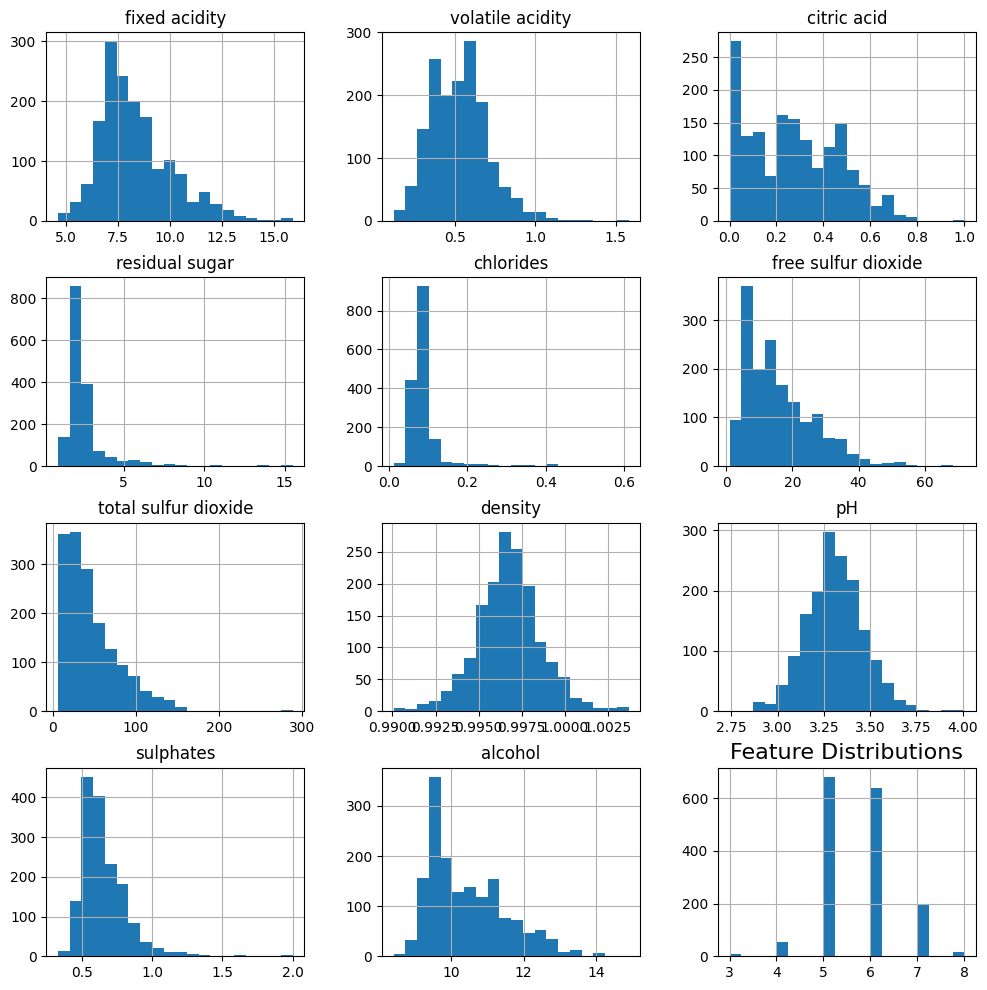

In [51]:
# Plot feature distributions
df.hist(figsize=(12, 12), bins=20)
plt.title("Feature Distributions", fontsize=16)
plt.show()

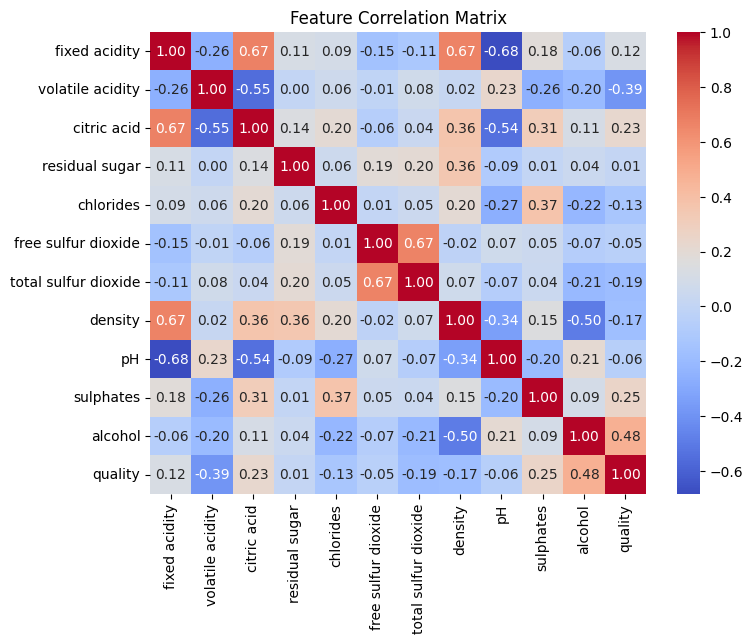

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


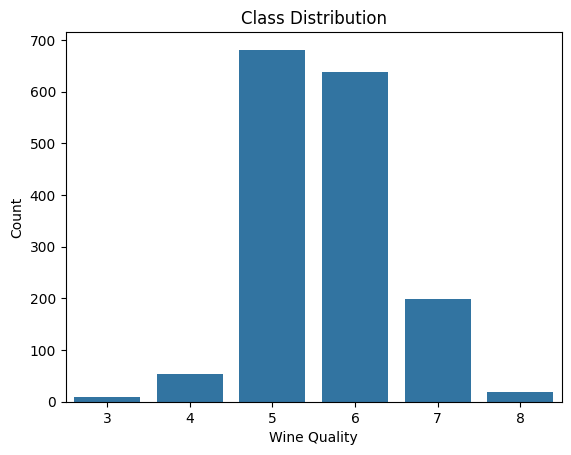

In [53]:
sns.countplot(x=df['quality'])
plt.title("Class Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


## Train Test Splitting

In [54]:
X=df.drop('quality',axis=1)
y=df['quality']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['quality'])

In [56]:
y_train

,quality
1542,6
1558,5
344,6
924,5
971,6
...,...
1056,7
1394,5
337,5
539,5


# Using Standard Scaler and Label Encoder

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Transform y_test using the same encoder

#2. Build and Train an MLP Classifier using TensorFlow

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=1,verbose=1)

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded),epochs=50,batch_size=1,callbacks=[early_stop],verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 9.


# Evaluate the Model

Optimizer: SGD
Training Loss: 0.8578022122383118
Training Accuracy: 0.6387802958488464
Validation Loss: 1.0281163454055786
Validation Accuracy: 0.628125011920929


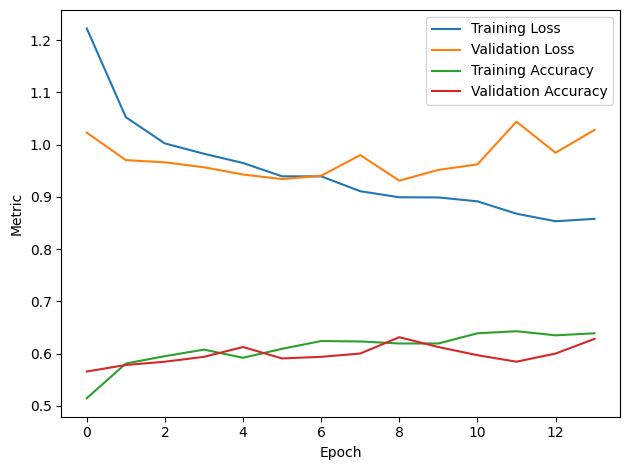

In [64]:
# Evaluate the model on the test data to get loss and accuracy
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)

print(f"Optimizer: SGD")
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Evaluate and Compare Optimizer Performance
  ## a. Training Loss vs Validation Loss

Restoring model weights from the end of the best epoch: 50.
Optimizer: Mini-batch SGD
Test Loss: 0.9880, Test Accuracy: 0.5844
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 21.
Optimizer: SGD with Momentum
Test Loss: 0.9700, Test Accuracy: 0.6000
Restoring model weights from the end of the best epoch: 50.
Optimizer: AdaGrad
Test Loss: 0.9823, Test Accuracy: 0.5906
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 23.
Optimizer: RMSprop
Test Loss: 0.9562, Test Accuracy: 0.6125
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 27.
Optimizer: Adam
Test Loss: 0.9388, Test Accuracy: 0.6250


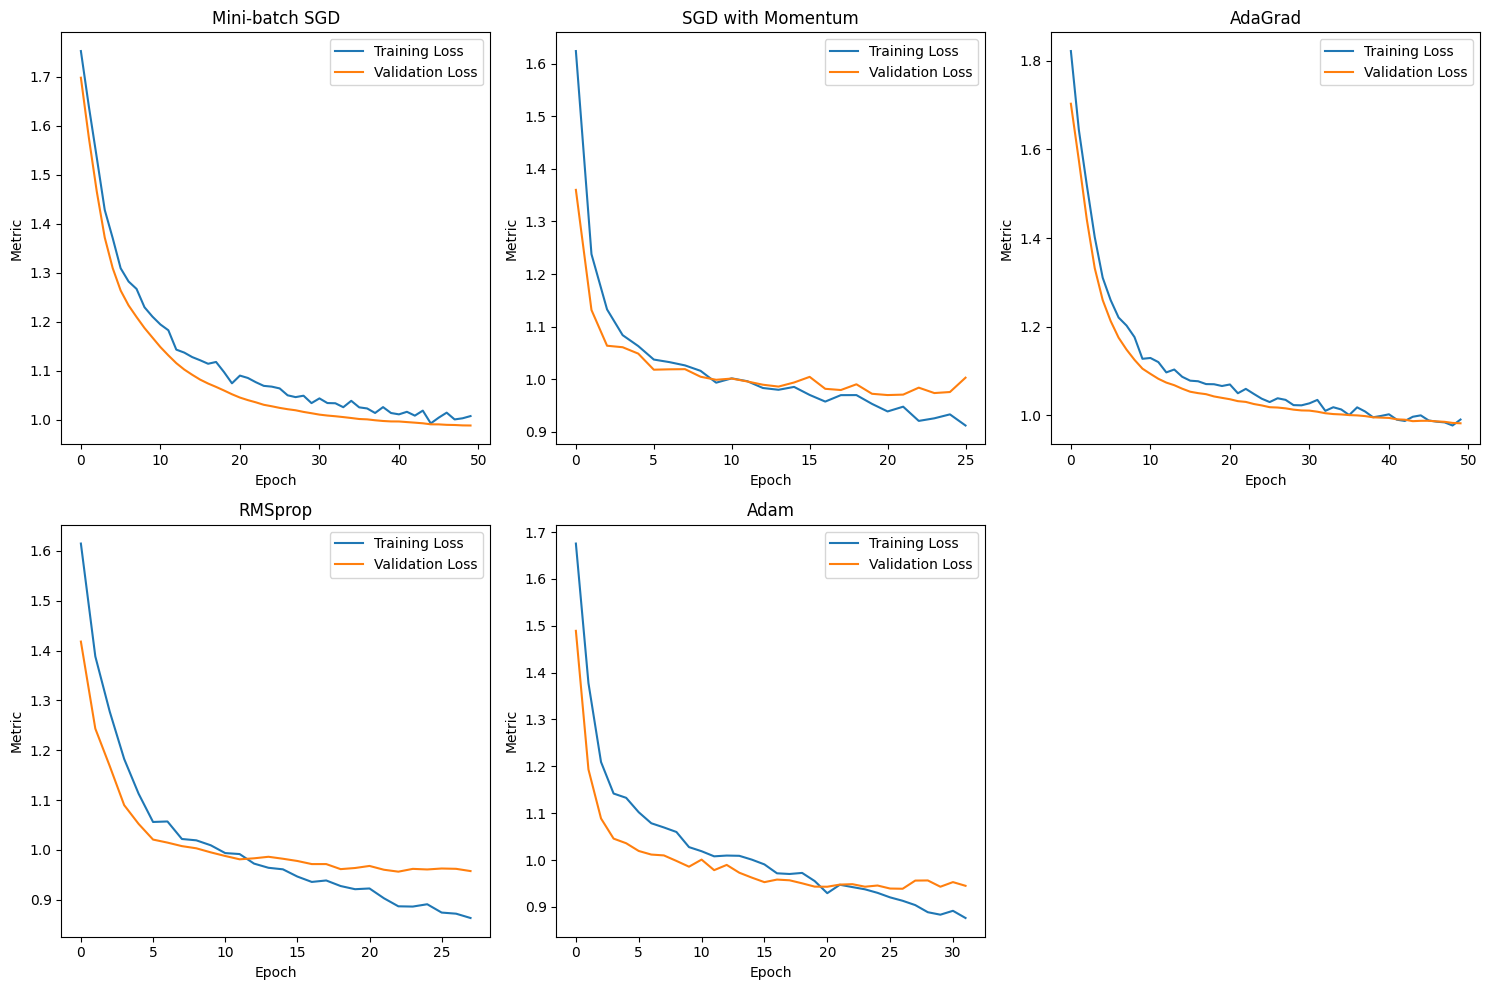

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
optimizers = {
    'Mini-batch SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'SGD with Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

results = {}

# Store all history objects so that all plots can be made.
all_histories = {}

for optimizer_name, optimizer in optimizers.items():
    model=Sequential()
    model.add(Dense(64,activation='relu',input_dim=11))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded),epochs=50,batch_size=32,callbacks=[early_stop],verbose=0)
    loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    results[optimizer_name] = {'loss': loss, 'accuracy': accuracy}
    all_histories[optimizer_name] = history

    print(f"Optimizer: {optimizer_name}")
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plotting loss and accuracy for each optimizer
plt.figure(figsize=(15, 10))
for i, (optimizer_name, history) in enumerate(all_histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.plot(history.history['accuracy'], label='Training Accuracy')
    # plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(optimizer_name)
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
plt.tight_layout()
plt.show()

  ## b. Training Accuracy vs Validation Accuracy

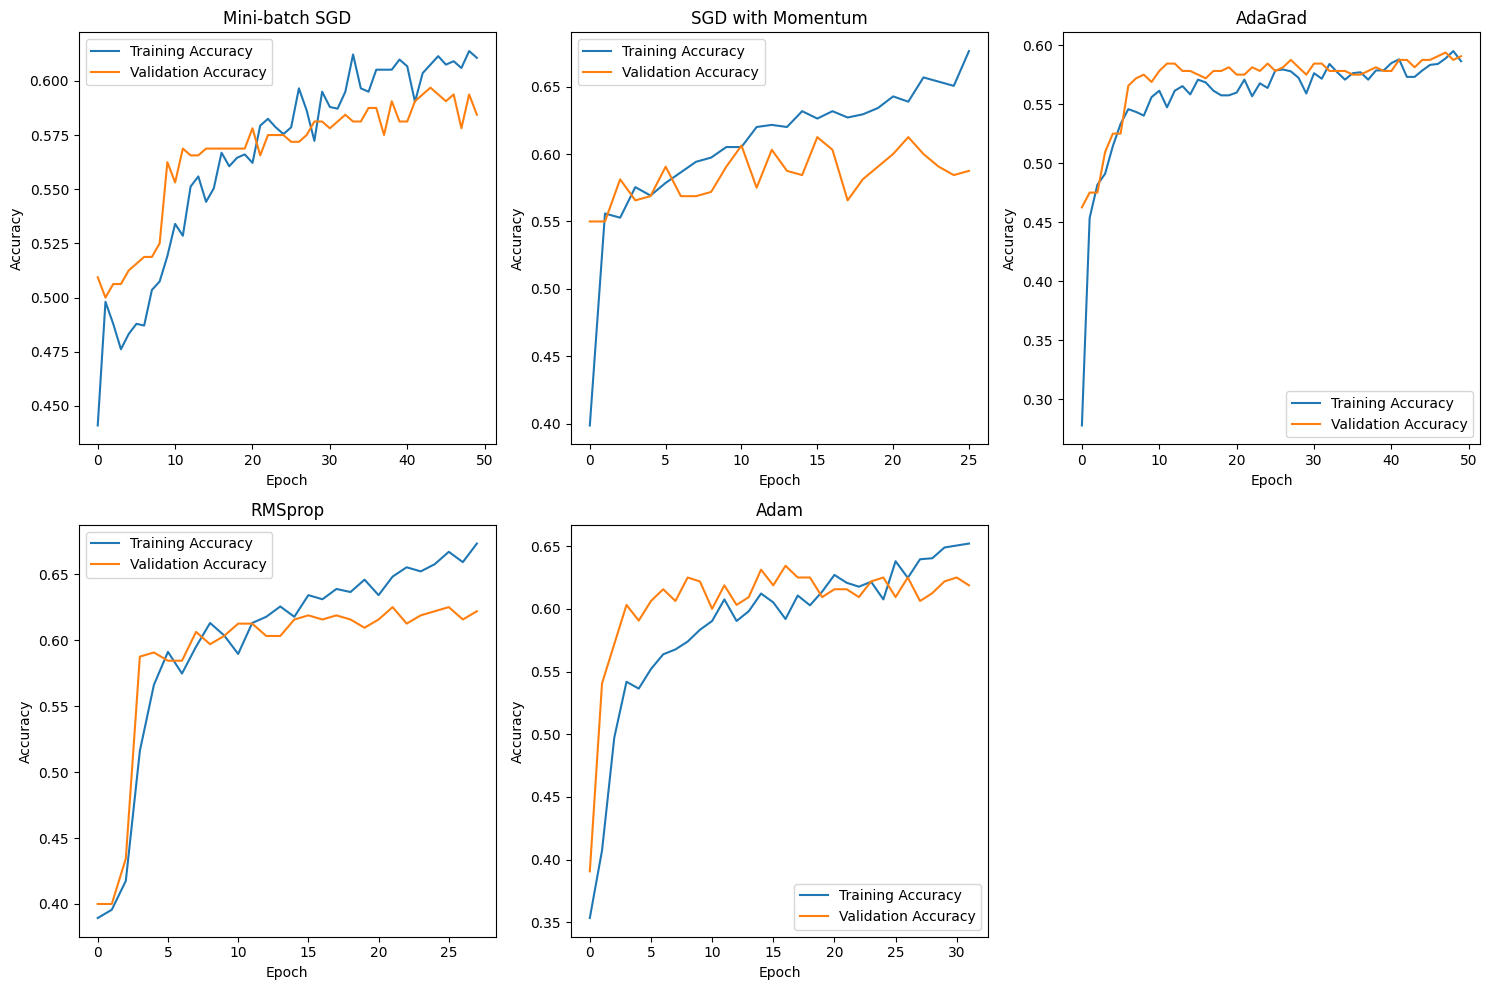

Final Accuracies:
Mini-batch SGD: 0.5844
SGD with Momentum: 0.6000
AdaGrad: 0.5906
RMSprop: 0.6125
Adam: 0.6250


In [66]:
plt.figure(figsize=(15, 10))
for i, (optimizer_name, history) in enumerate(all_histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(optimizer_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

# Printing final accuracy for each optimizer
print("Final Accuracies:")
for optimizer_name, result in results.items():
    print(f"{optimizer_name}: {result['accuracy']:.4f}")
